In [1]:
import  sys
sys.path.append('../')
import  latexStrings  as ls
from IPython.display import Latex
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import pdesolver

# Ejercicio 2

Dado el PVIF (\ref{eq:1}) planteado anteriormente, veamos el comportamiento del metodo implicito para su aproximacion:

In [2]:
u = lambda x, t: np.exp(-np.pi*t)*np.sin(np.pi*x)
eq= {}
eq['D'] = 1/np.pi
eq['ic'] = lambda x : np.sin(np.pi*x)
eq['bcL'] = lambda t : 0
eq['bcR'] = lambda t : -np.pi*np.exp(-np.pi*t)
Ix = [0, 1]
It = [0, 1]

Primero observemos una grafica de la aproximacion usando 20 pasos en el espacio ($h = 1/20$) y 10 pasos en el tiempo ($k = 1/10$):

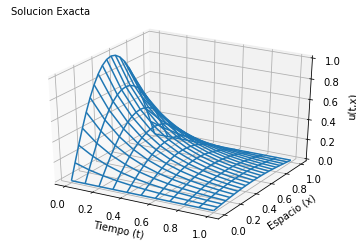

In [3]:
M = 20
N = 10

W, X, T = pdesolver.implicitHeat(eq, Ix, It, M, N)
U = np.array([[u(x,t) for t in T] for x in X])

MeshT, MeshX = np.meshgrid(T, X)

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot_wireframe(MeshT, MeshX, U)

ax.text2D(0, 1, "Solucion Exacta", transform=ax.transAxes)
ax.set_xlabel('Tiempo (t)')
ax.set_ylabel('Espacio (x)')
ax.set_zlabel('u(t,x)')

plt.show()

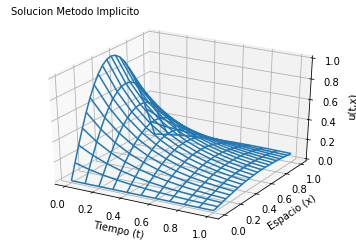

In [4]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot_wireframe(MeshT, MeshX, W)

ax.text2D(0, 1, "Solucion Metodo Implicito", transform=ax.transAxes)
ax.set_xlabel('Tiempo (t)')
ax.set_ylabel('Espacio (x)')
ax.set_zlabel('u(t,x)')

plt.show()

Vemos que con los mismos pasos en el tiempo, pero mas de 20 veces menos los pasos en el tiempo, el metodo implicito obtiene una aproximacion comparable a la del metodo explicito. Ahora veamos como varia el error al considerar los pasos $k = \{1/16, 1/64, 1/256\}$ y $h = \{ 1/10, 1/20, 1/40 \}$:

In [5]:
h = [10, 20, 40]
k = [16, 64, 256]
Errores = []
for M in h:
    for N in k:
        W, X, T = pdesolver.implicitHeat(eq, Ix, It, M, N)
        U = u(X, 1)
        Errores.append(max(abs(U-W[:,-1])))

data = [['1/10'], ['1/20'], ['1/40']]
data[0].extend(Errores[:3])
data[1].extend(Errores[3:6])
data[2].extend(Errores[6:])
header = ['\diagbox{h}{k}', '1/16', '1/64', '1/256']
Latex(ls.latexTable(header, data, 'r|rrr'))

<IPython.core.display.Latex object>

----Iterpretar ----

Ahora consideremos los pasos $k = h = \{ 1/10, 1/20, 1/40 \}$:

In [6]:
h = [10, 20, 40]
k = [10, 20, 40]
Errores = []
for M in h:
    for N in k:
        W, X, T = pdesolver.implicitHeat(eq, Ix, It, M, N)
        U = u(X, 1)
        Errores.append(max(abs(U-W[:,-1])))

data = [['1/10'], ['1/20'], ['1/40']]
data[0].extend(Errores[:3])
data[1].extend(Errores[3:6])
data[2].extend(Errores[6:])
header = ['\diagbox{h}{k}', '1/10', '1/20', '1/40']
Latex(ls.latexTable(header, data, 'r|rrr'))

<IPython.core.display.Latex object>

--- Interpretar ---

Finalmente tomemos los pasos $h = 1/10$, $k = \{1/25, 1/50, 1/100, 1/200\}$:

In [7]:
M = 10
k = [25, 50, 100, 200]
Errores = []
for N in k:
    W, X, T = pdesolver.implicitHeat(eq, Ix, It, M, N)
    U = u(X, 1)
    Errores.append(max(abs(U-W[:,-1])))

data = [['1/10']]
data[0].extend(Errores)
header = ['\diagbox{h}{k}', '1/25', '1/50', '1/100', '1/200']
Latex(ls.latexTable(header, data, 'r|rrrr'))

<IPython.core.display.Latex object>

--- Interpretar ---